##   <center> Business Overview </center>

<center><img src="Logo.png"/></center>
Fire Maul Tools is a firefighter-owned company serving firefighters, tactical teams, and military personnel worldwide by providing innovative tools that were designed for what they do. The company started by producing handmade firefighting tools such as axes and halligan bars, but since then has expanded their product breadth to include items such as tool lube and grip kits. The grip kits are just what they sound like, it is a fiber tape that comes with a lacing ring system that greatly improves grip on the tools. The item has proved to be very popular and the business owner wants to make sure he is getting the most out of the product while keeping his cost down. That is why Fire Maul Tools has tasked me with forecasting the future demand of the grip kits. This way the company can plan its purchasing and inventory levels more effeciently which will lead to lower costs associated with excessive inventory or stockouts. By following the Data Science methodology and utilizing time-series machine learning techniques, I plan to accomplish this task and help Fire Maul Tools grow as a company so that they can continue to serve First Responders.

**** 

## <center> Data Understanding </center>
 To complete this task, I have been given a dataset with the needed information that will be used with our models. Again, the standard Data Science methodology will be followed:
 -  Obtain the Data
 -  Clean the Data
 -  Exploration
 -  Model
 -  Interpret

We will now begin by importing the data and python libraries we will need in the project. Following that we will take an initial glance at the dataset to see what it contains and what format it is in. We will also need to address things like missing values and unnecessary columns. The idea is that after performing these cleaning steps, we will have a better understanding of the information in the table and that will lead to creating better model outputs.


In [274]:
# Importing libraries 

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#importing libraries to read the files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime 
from pylab import rcParams

#importing libraries to be used in model building
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

%matplotlib inline


# Importing dataset
df = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/capstone/Wraps.csv')




In [275]:
# Taking a look at the first few rows...
df.head()

,Unnamed: 0,Date,Transaction Type,Num,Customer,Memo/Description,Qty,Sales Price,Amount,Balance
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,#1394,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,#1477,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,49.90
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,#1511,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,74.85
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,#1617,NaN,FireWrap Grip Kit,1.0,34.95,34.95,109.80


In [276]:
# Checking the columns, Dtype, and number of rows..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5799 non-null   object 
 1   Date              5761 non-null   object 
 2   Transaction Type  5761 non-null   object 
 3   Num               5761 non-null   object 
 4   Customer          0 non-null      float64
 5   Memo/Description  5558 non-null   object 
 6   Qty               5780 non-null   float64
 7   Sales Price       5747 non-null   float64
 8   Amount            5780 non-null   object 
 9   Balance           5761 non-null   object 
dtypes: float64(3), object(7)
memory usage: 453.3+ KB


***
So We see 10 columns with varying null counts and Dtypes. Many of these columns seem self-explanatory but others not as much. We will take a look into some of these columns and see what we can learn, starting with 'Unnamed: 0'.
****

In [277]:
# Unnamed: 0


# Lets see what the rows of this column contains...
df['Unnamed: 0'].unique()

array(['FireWrap Grip Kit - Light Blue',
       'Total for FireWrap Grip Kit - Light Blue',
       'FireWrap Grip Kit - Pink', 'Total for FireWrap Grip Kit - Pink',
       'FireWrap® Grip Kit Black', 'Total for FireWrap® Grip Kit Black',
       'FireWrap® Grip Kit Blue', 'Total for FireWrap® Grip Kit Blue',
       'FireWrap® Grip Kit GLOW - Aqua',
       'Total for FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'Total for FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Total for FireWrap® Grip Kit Orange',
       'FireWrap® Grip Kit Red', 'Total for FireWrap® Grip Kit Red',
       'FireWrap® Grip Kit Yellow', 'Total for FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'Total for FireWrap® Grip Kit Green',
       'FireWrap® Grip Kit White', 'Total for FireWrap® Grip Kit White',
       'TOTAL', nan,
       'Wednesday, Jan 11, 2023 10:03:05 AM GMT-8 - Accrual Basis'],
      dtype=object)

In [278]:
# Count for each item under this column
df['Unnamed: 0'].value_counts()

FireWrap® Grip Kit Black                                     1622
FireWrap® Grip Kit Red                                       1272
FireWrap® Grip Kit Blue                                       631
FireWrap® Grip Kit Orange                                     517
FireWrap® Grip Kit GLOW - Green ( 927 )                       479
FireWrap® Grip Kit GLOW - Aqua                                432
FireWrap® Grip Kit Yellow                                     332
FireWrap® Grip Kit Green                                      323
FireWrap® Grip Kit White                                      145
FireWrap Grip Kit - Light Blue                                 16
FireWrap Grip Kit - Pink                                       10
Total for FireWrap® Grip Kit GLOW - Green ( 927 )               2
Total for FireWrap® Grip Kit Yellow                             2
Total for FireWrap® Grip Kit GLOW - Aqua                        2
Total for FireWrap® Grip Kit Red                                2
Total for 

In [279]:
print('Total Units Sold =',df['Qty'].sum())
print('***********')
print('***********')


print(df['Qty'].describe())

Total Units Sold = 41931.0
***********
***********
count     5780.000000
mean         7.254498
std        194.372165
min         -5.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      13977.000000
Name: Qty, dtype: float64




<br></br>
***
The 'Unnamed' column primarily looks like the different options of colors for the grip kits, but when it was entered into their accounting system the 'Total' for each option was put in the same column. This will be addressed later.

To get a better understanding of the products and units sold I printed some information off in the previous cell. But again this number will change as you clean the dataframe and remove the 'Total' rows.
***

#### Date

In [280]:
# Date


# Number of rows with different dates...
df['Date'].nunique()

1467

In [281]:
# Date
# Total number of different dates, with the most frequent date..
df['Date'].describe()

count           5761
unique          1467
top       03/27/2021
freq              48
Name: Date, dtype: object

In [282]:
# Glance at different value counts per each date...
df['Date'].value_counts()

03/27/2021    48
04/27/2018    39
05/03/2022    36
01/19/2021    33
04/26/2018    33
              ..
08/11/2018     1
10/14/2020     1
09/04/2018     1
08/30/2020     1
11/19/2018     1
Name: Date, Length: 1467, dtype: int64

In [283]:
# Table to find the beginning and end of dates...
date_range = df.groupby('Date').sum().reset_index()
date_range = date_range.sort_values(by= 'Date', ascending = False)
date_range.head()

,Date,Customer,Qty,Sales Price
1466,12/31/2022,0.0,7.0,115.80
1465,12/31/2021,0.0,1.0,24.95
1464,12/31/2020,0.0,3.0,87.85
1463,12/31/2019,0.0,1.0,34.95
1462,12/31/2018,0.0,3.0,117.85


In [284]:
date_range.tail()

,Date,Customer,Qty,Sales Price
4,01/02/2019,0.0,1.0,34.95
3,01/01/2023,0.0,8.0,195.70
2,01/01/2022,0.0,3.0,37.95
1,01/01/2021,0.0,3.0,87.85
0,01/01/2020,0.0,2.0,69.90


<br></br>
***
This is obviously the date of the sales transaction, this will be a large part of our future models and we will look more into this during our EDA phase.
***

#### Transaction Type

In [285]:
# Transaction Type


# All the different types of Transactions...
df['Transaction Type'].unique()

array([nan, 'Sales Receipt', 'Invoice', 'Refund', 'Credit Memo'],
      dtype=object)

In [286]:
# Total count and most frequent type for Transactions...
df['Transaction Type'].describe()

count              5761
unique                4
top       Sales Receipt
freq               4589
Name: Transaction Type, dtype: object

In [287]:
df['Transaction Type'].value_counts()

Sales Receipt    4589
Invoice          1164
Refund              7
Credit Memo         1
Name: Transaction Type, dtype: int64

***
So this shows 4 different transaction types, with the Sales Receipt and Invoice being the ones we are concerned with. These both represent a unit sold and are only categorized differently due to how they were purchased or billed( on-line or in-person). The 7 refunds and 1 credit luckily only represent a fraction of a percent of the transactions which is good because these will not be inlcuded.
***

#### Num

In [288]:
# Num:


# Glance at different values under the Num column..
df['Num'].unique()

array([nan, '#1394', '#1477', ..., 'M-072022-001', 'M-090722-003',
       'M-092522-001'], dtype=object)

In [289]:
df['Num'].describe()

count             5761
unique            4487
top       M-032721-001
freq                17
Name: Num, dtype: object

In [290]:
df['Num'].value_counts()

M-032721-001    17
M-032721-006    17
1372            10
M-022122-005     9
M-103122-002     9
                ..
7756             1
#2301            1
9385             1
#2280            1
9351             1
Name: Num, Length: 4487, dtype: int64

***
These items are just numbers associated with the order and are not for the model.
***

#### Quantity

In [291]:
#Qty

# A glance at the quantity of units sold
df['Qty'].describe()

count     5780.000000
mean         7.254498
std        194.372165
min         -5.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      13977.000000
Name: Qty, dtype: float64

In [292]:
df['Qty'].value_counts()

 1.0        3735
 2.0         852
 4.0         259
 3.0         247
 5.0         163
 6.0         141
 10.0         86
 8.0          71
 7.0          43
 20.0         22
 12.0         18
 15.0         15
 0.0          15
 9.0          12
 11.0         11
 14.0         10
 16.0          8
 17.0          8
-1.0           6
 13.0          6
 18.0          4
 25.0          4
 21.0          4
 40.0          3
 22.0          3
 36.0          2
 32.0          2
 24.0          2
 150.0         2
 617.0         1
 400.0         1
 1261.0        1
 300.0         1
 204.0         1
 2584.0        1
 77.0          1
 283.0         1
 907.0         1
 27.0          1
 464.0         1
 34.0          1
 212.0         1
 50.0          1
 619.0         1
 868.0         1
 699.0         1
 33.0          1
 727.0         1
 3143.0        1
-5.0           1
 30.0          1
 28.0          1
 13977.0       1
 323.0         1
 951.0         1
Name: Qty, dtype: int64

In [293]:
df['Qty'].sum()

41931.0

***
The quantity of the units sold is the other crucial element that will be used in our models along with the dats. This column needs to be properly scrubbed to ensure the best output from our models. For example we saw the the 'Total' of products sold was in the same column as the different types of kits, therefore some of these quanities probably represent individual sales and total sales for a particular grip kit. This will be addressed.
***
<br></br>

#### Sales Price


In [294]:
df['Sales Price'].describe()

count    5747.000000
mean       28.608251
std         6.455207
min         0.000000
25%        24.950000
50%        27.950000
75%        34.950000
max        47.950000
Name: Sales Price, dtype: float64

In [295]:
df['Sales Price'].value_counts()

24.95    1247
27.95    1102
34.95     762
24.99     632
37.95     400
18.75     313
21.75     313
40.95     158
47.95     146
28.95     127
30.00     115
19.99      89
28.50      69
22.95      47
31.50      43
26.00      32
41.95      27
28.00      16
32.99      14
41.00      14
16.50      13
25.00      12
36.00      12
20.00      11
35.99       8
29.00       8
24.00       4
15.00       4
0.00        4
32.00       2
34.00       1
12.95       1
37.90       1
Name: Sales Price, dtype: int64

<br></br>
We will need to answer a few questions about this category, there is a large number of price points, although the mean and standard deviation indicates the price mostly sits around the high 20 dollar mark. For now lets rename the column to get rid of the space, this may make things easier down the road.

In [296]:
# Removing space..
df.rename(columns={'Sales Price':'Sales_Price'}, inplace=True)


<br></br>

#### Missing values
Lets also take a look at missing values in the data and how to address them.

In [297]:
# Seeing how many missing values are in each column
df.isna().sum()

Unnamed: 0             2
Date                  40
Transaction Type      40
Num                   40
Customer            5801
Memo/Description     243
Qty                   21
Sales_Price           54
Amount                21
Balance               40
dtype: int64

So there are a varying amount of Nan's throughout the columns, some of which makes sense and others need to be addressed. Lets tighten up the columns in this Dataframe and then work on the missing values.
***

In [298]:
# Make sure that index is DatetimeIndex named "date"
# if isinstance(df.index, pd.DatetimeIndex):
#    df.index.name = 'Date'
# else:
#    df.rename(columns={'index':'Date'}, inplace=True)
#    df.set_index('Date', inplace=True)
    
# df

### <center>Data Preparation</center>
After the initial look at the dataset we see there are 10 rows of which almost all of them are 'object' which means they are not in numerical form, the Non-Null Count also varies between column. The 'Unnamed : 0' column looks to be the product type and the 'Customer' column was cleared previously so no personal information would be shared. We will continue to look at each column individually in an effort to understand the data, and clean it in order for it to be used for modelling. For example, we need to understand what is the difference between 'Sales Price', 'Amount', and 'Balance'.

First lets look at the 'Unnamed: 0' column. We already know that in a sense there are duplicate values for the products and quantity because of the presence of the rows where the sales are totalled.
****
##### Unnamed: 0

In [299]:
df['Unnamed: 0'].unique()

array(['FireWrap Grip Kit - Light Blue',
       'Total for FireWrap Grip Kit - Light Blue',
       'FireWrap Grip Kit - Pink', 'Total for FireWrap Grip Kit - Pink',
       'FireWrap® Grip Kit Black', 'Total for FireWrap® Grip Kit Black',
       'FireWrap® Grip Kit Blue', 'Total for FireWrap® Grip Kit Blue',
       'FireWrap® Grip Kit GLOW - Aqua',
       'Total for FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'Total for FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Total for FireWrap® Grip Kit Orange',
       'FireWrap® Grip Kit Red', 'Total for FireWrap® Grip Kit Red',
       'FireWrap® Grip Kit Yellow', 'Total for FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'Total for FireWrap® Grip Kit Green',
       'FireWrap® Grip Kit White', 'Total for FireWrap® Grip Kit White',
       'TOTAL', nan,
       'Wednesday, Jan 11, 2023 10:03:05 AM GMT-8 - Accrual Basis'],
      dtype=object)

#### Product names
We see that there are a few issues here. First there is the product name for each available color and also the total sales for that product are both in this column. They should be separated to make it easier to decipher in the pandas dataframe. There are 2 different 'Green' options, one is called 'Glow' which is exactly what it sounds like, the wrap will glow in the dark. This does lead us to a question that we do need to address.....does the color of the Grip Kit have an impact on sales? The answer to this question is something that we will try to find in our EDA phase. 
For now we will begin by renaming the column and then see if there is a way to simplify the product names.

In [300]:
#Changing column name to Product Id:
df= df.rename(columns={"Unnamed: 0": "Product_ID"})
df.head(10)

,Product_ID,Date,Transaction Type,Num,Customer,Memo/Description,Qty,Sales_Price,Amount,Balance
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,#1394,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,#1477,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,49.90
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,#1511,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,74.85
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,#1617,NaN,FireWrap Grip Kit,1.0,34.95,34.95,109.80
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,1133,NaN,NaN,4.0,26.00,104.00,213.80
6,FireWrap Grip Kit - Light Blue,10/09/2018,Sales Receipt,#1895,NaN,FireWrap Grip Kit,1.0,34.95,34.95,248.75
7,FireWrap Grip Kit - Light Blue,11/30/2018,Sales Receipt,#2045,NaN,FireWrap Grip Kit,1.0,34.95,34.95,283.70
8,FireWrap Grip Kit - Light Blue,12/30/2018,Sales Receipt,#2149,NaN,FireWrap Grip Kit,1.0,34.95,34.95,318.65
9,FireWrap Grip Kit - Light Blue,01/23/2019,Invoice,1257,NaN,NaN,1.0,30.00,30.00,348.65


*** 
The column has been renamed, but I still want to work on this one a little more. My assumption is that the colors of the kits will not matter in the long run when it comes to the models. But to act on that assumption I will look more into it during the EDA phase. Right now I am going to continue to clean the DataFrame by dropping some columns and addressing the Nan's.
The columns that I am going to drop now are:
-  Num: A number assigned to each order, will not be useful going forward
-  Customer: These rows were already emptied so that no personal information would be shared
-  Memo/Description: These rows do not contain anything of value for us so it can be removed
-  Balance: According to the business owner this was a tally kept for customers that depended on how they paid, for example, in-person or through the website, and will not help our models

I have also clarified with the business owner that 'Amount' is simply the 'Sales Price' times the quantity of products sold. We will include these columns through our EDA phase and then decide the best way to move forward with the models. 



In [301]:
# Dropping the 4 listed columns...
df.drop(columns= ['Num','Customer', 'Memo/Description', 'Balance'], inplace = True )

In [302]:
df.head(25)

,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,1.0,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,1.0,24.95,24.95
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,1.0,24.95,24.95
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,1.0,34.95,34.95
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,4.0,26.00,104.00
6,FireWrap Grip Kit - Light Blue,10/09/2018,Sales Receipt,1.0,34.95,34.95
7,FireWrap Grip Kit - Light Blue,11/30/2018,Sales Receipt,1.0,34.95,34.95
8,FireWrap Grip Kit - Light Blue,12/30/2018,Sales Receipt,1.0,34.95,34.95
9,FireWrap Grip Kit - Light Blue,01/23/2019,Invoice,1.0,30.00,30.00


***
This is already looking a lot cleaner. Less columns makes it much easier to look at and get a good understanding of the information inside the table. There is still the issue of Nan's being present in the dataset and we will look into those now. Instead of just dropping them I want to take a look first to make sure there is no pertinent info that we will lose.

In [303]:
# Missing values in the new dataframe...
df.isna().sum()

Product_ID           2
Date                40
Transaction Type    40
Qty                 21
Sales_Price         54
Amount              21
dtype: int64

In [304]:
# Nans in the Product ID column...
df[pd.isna(df['Product_ID'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
5798,NaN,NaN,NaN,NaN,NaN,NaN
5799,NaN,NaN,NaN,NaN,NaN,NaN


So the 2 Nan's in this column are literally totally blank, this makes it an easy decision to remove them.
Lets look at some of the other categories.
<br></br>
***

In [305]:
# Missing values in the Date column...
df[pd.isna(df['Date'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
16,Total for FireWrap Grip Kit - Light Blue,NaN,NaN,21.0,NaN,$\t635.40
17,FireWrap Grip Kit - Pink,NaN,NaN,NaN,NaN,NaN
27,Total for FireWrap Grip Kit - Pink,NaN,NaN,17.0,NaN,$\t495.70
28,FireWrap® Grip Kit Black,NaN,NaN,NaN,NaN,NaN
1542,Total for FireWrap® Grip Kit Black,NaN,NaN,3143.0,NaN,"$\t83,985.16"
1543,FireWrap® Grip Kit Blue,NaN,NaN,NaN,NaN,NaN
2090,Total for FireWrap® Grip Kit Blue,NaN,NaN,1261.0,NaN,"$\t33,334.49"
2091,FireWrap® Grip Kit GLOW - Aqua,NaN,NaN,NaN,NaN,NaN
2494,Total for FireWrap® Grip Kit GLOW - Aqua,NaN,NaN,699.0,NaN,"$\t27,309.29"


In [306]:
# Missing values in the Sales Price column....
df[pd.isna(df['Sales_Price'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
16,Total for FireWrap Grip Kit - Light Blue,NaN,NaN,21.0,NaN,$\t635.40
17,FireWrap Grip Kit - Pink,NaN,NaN,NaN,NaN,NaN
27,Total for FireWrap Grip Kit - Pink,NaN,NaN,17.0,NaN,$\t495.70
28,FireWrap® Grip Kit Black,NaN,NaN,NaN,NaN,NaN
381,FireWrap® Grip Kit Black,07/21/2019,Invoice,0.0,NaN,0.00
383,FireWrap® Grip Kit Black,07/23/2019,Invoice,0.0,NaN,0.00
1542,Total for FireWrap® Grip Kit Black,NaN,NaN,3143.0,NaN,"$\t83,985.16"
1543,FireWrap® Grip Kit Blue,NaN,NaN,NaN,NaN,NaN
2090,Total for FireWrap® Grip Kit Blue,NaN,NaN,1261.0,NaN,"$\t33,334.49"


I dont even need to look at the other categories because I can see that accroding to null value counts all the missing values are located in the same parts of the table, as seen above. These were caused by breaks in the excel page between products or on the rows where the product sales were totalled for that particular grip kit color. Therefore these can all be dropped and it should not effect our models because we are not losing pertinent information
***

In [307]:
# Dropping the nulls..
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Product_ID          0
Date                0
Transaction Type    0
Qty                 0
Sales_Price         0
Amount              0
dtype: int64

In [308]:
# Checking tables info to see the same amount of rows among columns...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 1 to 5795
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5747 non-null   object 
 1   Date              5747 non-null   object 
 2   Transaction Type  5747 non-null   object 
 3   Qty               5747 non-null   float64
 4   Sales_Price       5747 non-null   float64
 5   Amount            5747 non-null   object 
dtypes: float64(2), object(4)
memory usage: 314.3+ KB


In [309]:
# Should be looking better....
df.head()

,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,1.0,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,1.0,24.95,24.95
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,1.0,24.95,24.95
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,1.0,34.95,34.95
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,4.0,26.00,104.00


In [310]:
# Making sure the 'Total' rows are no longer present as they interfere with continuation..
df['Product_ID'].value_counts()

FireWrap® Grip Kit Black                   1615
FireWrap® Grip Kit Red                     1267
FireWrap® Grip Kit Blue                     628
FireWrap® Grip Kit Orange                   514
FireWrap® Grip Kit GLOW - Green ( 927 )     474
FireWrap® Grip Kit GLOW - Aqua              429
FireWrap® Grip Kit Yellow                   330
FireWrap® Grip Kit Green                    322
FireWrap® Grip Kit White                    144
FireWrap Grip Kit - Light Blue               15
FireWrap Grip Kit - Pink                      9
Name: Product_ID, dtype: int64

<br></br>
***

In [311]:
# still some other values that still need to be dropped....
df['Transaction Type'].value_counts()

Sales Receipt    4589
Invoice          1151
Refund              7
Name: Transaction Type, dtype: int64

#### Refunds
Dropping the rows with the Nan's also took care of the 'Credit Memo' under 'Transaction Types', but we should still get rid of those 7 refunds since they are not sales.

In [312]:
# Dropping refunds and checking the values...
df.drop(df.loc[df['Transaction Type']=='Refund'].index, inplace=True)
df['Transaction Type'].value_counts()

# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Sales Receipt    4589
Invoice          1151
Name: Transaction Type, dtype: int64

In [313]:
# Making sure table looks appropriate...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5740 entries, 1 to 5795
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Date              5740 non-null   object 
 2   Transaction Type  5740 non-null   object 
 3   Qty               5740 non-null   float64
 4   Sales_Price       5740 non-null   float64
 5   Amount            5740 non-null   object 
dtypes: float64(2), object(4)
memory usage: 313.9+ KB


<br></br>
****
In our Data Understanding phase we printed out some information on the 'Qty' column, but now that our table has been cleaned it is going to show different, more accurate results:

In [314]:
print('Total Units Sold =',df['Qty'].sum())
print('***********')
print('***********')


print(df['Qty'].describe())

Total Units Sold = 13988.0
***********
***********
count    5740.000000
mean        2.436934
std         7.778742
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       400.000000
Name: Qty, dtype: float64


In [315]:
# filter the rows where Quantity is greater than 100
df_qty = df[df['Qty'] > 100]

# print the Quantity column of the filtered DataFrame
(df_qty['Qty'])


275     400.0
2212    150.0
3543    300.0
4571    150.0
Name: Qty, dtype: float64

***
We see 
- A Total of 13,988 units sold
- An aprroximate average of 2.5 units sold per order
- A standard deviation of 7.7
- The largest order was 400 units

After I looked at these numbers it struck me that 400 was quite a large order considering the mean and standard deviation. So in the previous cell we see there are only 4 orders with more than 100 units, and they all appear to be part of the same order. This can become an issue in terms of stationarity and outliers. I may consider running 2 models, one with these larger orders and one without them. During the EDA phase we will have to pay very special attention to this aspect.

***
### <center>Exploratory Data Analysis</center>

Continuing with the Data Preperation phase now that the table is vastly easier to read and understand, I would also like to include some visuals for both reference and help understand trends. I will start by using the 'sweetviz' library which is good for general data analysis. And from there create some more specific visuals as needed. 

The results will open on a separate page.

In [316]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<br></br>
The report gave a nice break down of the number of sales for each available grip kit color and the different sales prices. Some of the other categories we will look at a little closer.
***


#### Sales Price

The sales plot shows some variation, this is something we want to get a handle on as it can obviously have a large influence on the amount of sales. Lets take a look.

In [317]:
# Creating a table to show the amount of sales for a specific price point...

#This table will be used for the coming visual...

sales = df.groupby('Sales_Price').sum().reset_index()
sales = sales.sort_values(by= 'Sales_Price', ascending = False)
print('******  Highest Prices *********')
print(sales.head())
print('*****  Lowest Prices  **********')
print(sales.tail())



******  Highest Prices *********
    Sales_Price    Qty
32        47.95  194.0
31        41.95   34.0
30        41.00   17.0
29        40.95  238.0
28        37.95  555.0
*****  Lowest Prices  **********
   Sales_Price     Qty
4        18.75  1391.0
3        16.50   164.0
2        15.00     8.0
1        12.95     1.0
0         0.00    27.0


In [318]:
# A similar table just putting it in order by QTY to see most popular price..
sales_order = df.groupby('Sales_Price').sum().reset_index()
sales_order = sales_order.sort_values(by= 'Qty', ascending = False)
sales_order.head()

,Sales_Price,Qty
14,27.95,2307.0
10,24.95,2282.0
7,21.75,1512.0
4,18.75,1391.0
11,24.99,1327.0


In [319]:
sales.describe()

,Sales_Price,Qty
count,33.000000,33.000000
mean,28.192727,423.878788
std,9.737082,654.523813
min,0.000000,1.000000
25%,22.950000,27.000000
50%,28.500000,150.000000
75%,34.950000,307.000000
max,47.950000,2307.000000


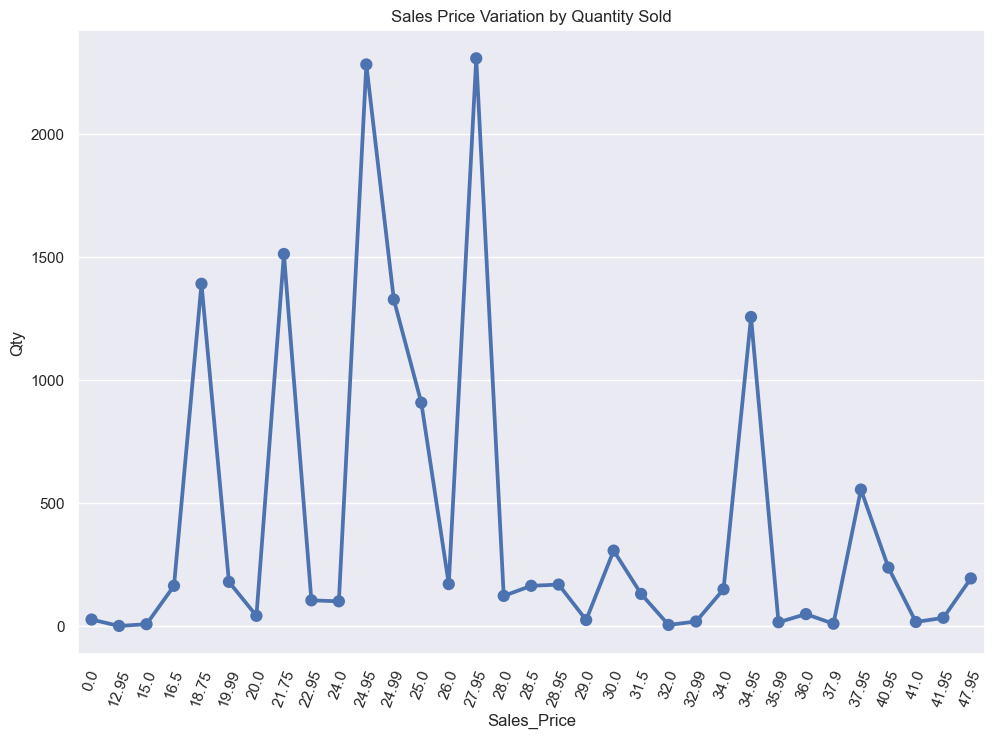

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Create the plot
sns.pointplot(data = sales, x ='Sales_Price', y ='Qty')
# Add a title, ticks
plt.title('Sales Price Variation by Quantity Sold')
plt.xticks(rotation = 70)
# Show the plot
plt.show()
#https://seaborn.pydata.org/generated/seaborn.pointplot.html


So there is some variation of prices here that comes from the business owner experimenting with prices over time.  According to him the price was initially 34.95 with a portion of those proceeds going to a PFAS study. After that the prices moved slightly between 27.95 and 24.95, with 27.95 being the current price. Some of the lower prices can be attributed to promotions or giveaways while the higher ones included donations or were in the early stages of finding a price point. As the majority of sales are close to the current listed price, I am confident there is not enough variance to negatively effect our model.
<br></br>
It should be also noted that is one of the reasons this project was started, finding an appropriate price for this company's product. I wanted to begin with this time-series project to assist with forecasting sales and inventory and hopefully end with price optimiztion after this is finished.
***
#### Sales By Grip Kit

We have inspected the sales price and made our decision on how to move forward, now lets look at sales by product.

In [321]:
# Setting the kits in order of most sold
products = df.groupby('Product_ID')['Qty'].sum().reset_index()
products = products.sort_values(by= 'Qty', ascending = False)
products

,Product_ID,Qty
2,FireWrap® Grip Kit Black,3763.0
8,FireWrap® Grip Kit Red,3313.0
3,FireWrap® Grip Kit Blue,1726.0
7,FireWrap® Grip Kit Orange,1235.0
10,FireWrap® Grip Kit Yellow,1081.0
6,FireWrap® Grip Kit Green,907.0
5,FireWrap® Grip Kit GLOW - Green ( 927 ),821.0
4,FireWrap® Grip Kit GLOW - Aqua,781.0
9,FireWrap® Grip Kit White,323.0
0,FireWrap Grip Kit - Light Blue,21.0


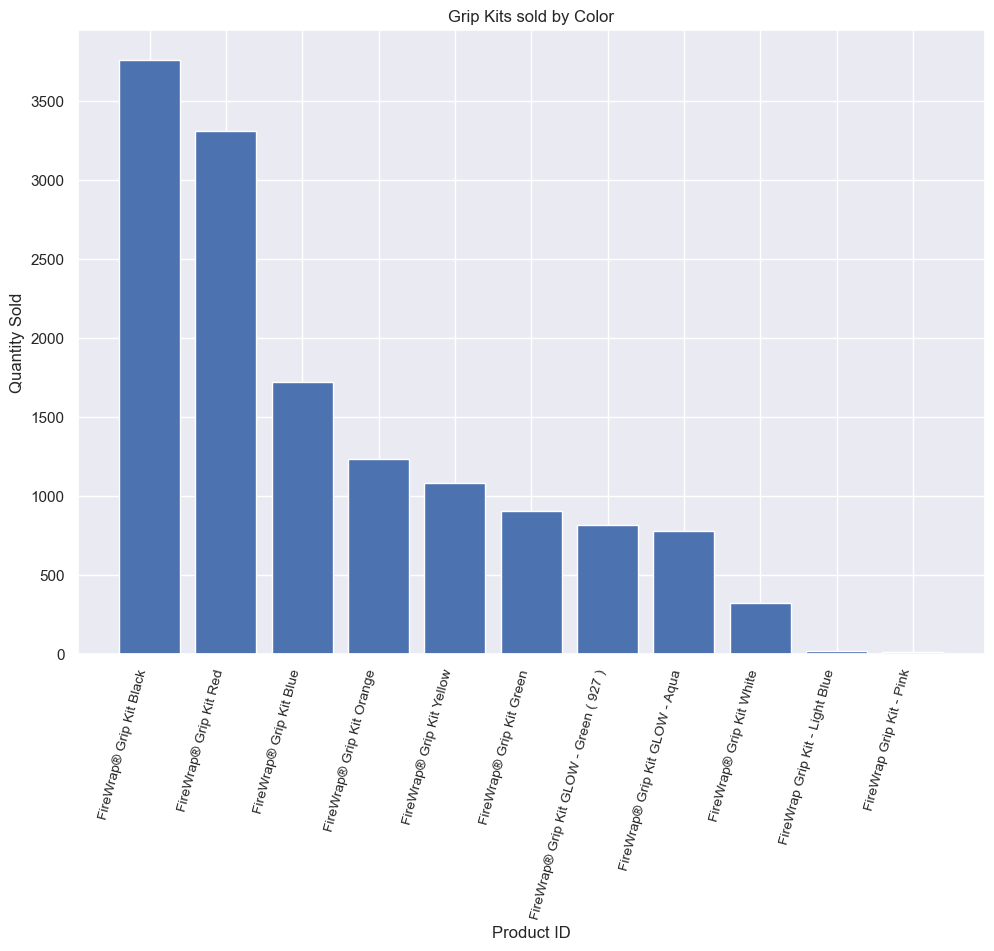

In [322]:
# Visual for sales... IN ORDER!
import matplotlib.pyplot as plt

# Create a bar chart that shows sales IN ORDER!
plt.bar(products['Product_ID'], products['Qty'])
fig = plt.figsize=(20,10)
plt.xlabel('Product ID')
plt.xticks(rotation = 75, fontsize = 10, ha= 'right')
plt.ylabel('Quantity Sold')
plt.title('Grip Kits sold by Color')

# Show the chart
plt.show()


In [323]:
# Attempting a function that shows what percentage of sales each kit is accountable for.


def grip_sales_percentage(df):
    # Group the dataframe by 'Product_ID' and sum of Qty column
    grip_sales = df.groupby('Product_ID')['Qty'].sum()
    # Get sum
    total_sales = grip_sales.sum()
    # Get the percentage of total sales for each grip kit
    grip_sales_percentage = grip_sales / total_sales * 100
    print(grip_sales_percentage)
grip_sales_percentage(df)

# https://sparkbyexamples.com/pandas/pandas-percentage-total-with-groupby/

Product_ID
FireWrap Grip Kit - Light Blue              0.150129
FireWrap Grip Kit - Pink                    0.121533
FireWrap® Grip Kit Black                   26.901630
FireWrap® Grip Kit Blue                    12.339148
FireWrap® Grip Kit GLOW - Aqua              5.583357
FireWrap® Grip Kit GLOW - Green ( 927 )     5.869317
FireWrap® Grip Kit Green                    6.484129
FireWrap® Grip Kit Orange                   8.828996
FireWrap® Grip Kit Red                     23.684587
FireWrap® Grip Kit White                    2.309122
FireWrap® Grip Kit Yellow                   7.728053
Name: Qty, dtype: float64


<br></br>
So we see black and red are most popular by far accounting for almost 50% of sales and an almost a 50% drop(23.6% to 12.3%) to blue in 3rd place. This should not be a total surprise as those are common colors of the fire industry. We are still trying to see if the colors should be kept in our models, or treat everything as one unique product. 
***
<br></br>
#### 'Datetimeindex'
In addition to the quantity of units sold the other essential factor we need to get in order is the dates. To do this we must set the dataframe index to 'DatetimeIndex' and name it 'Date'. This has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to resample the data.


#### Stationarity
It is recommended to check for stationarity before setting the DataFrame to a DatetimeIndex. The reason is that you want to make sure that the time series is stationary before applying any further time series analysis. A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time.

In the next cell we will check for stationarity on the data, depending on the results will decide whether or not to remove the large orders. We can test both visually and statistically, and I plan on checking for stationarity now and on our dataframe just to ensure accuracy. 

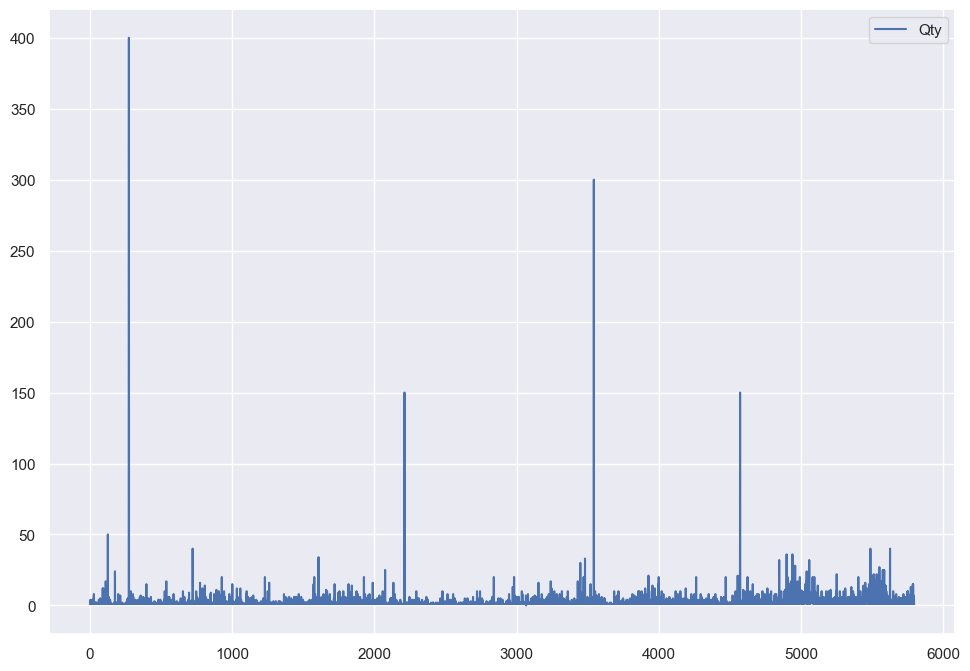

In [324]:

# Plot the time series of Qty
df.plot(y = 'Qty')
plt.show()

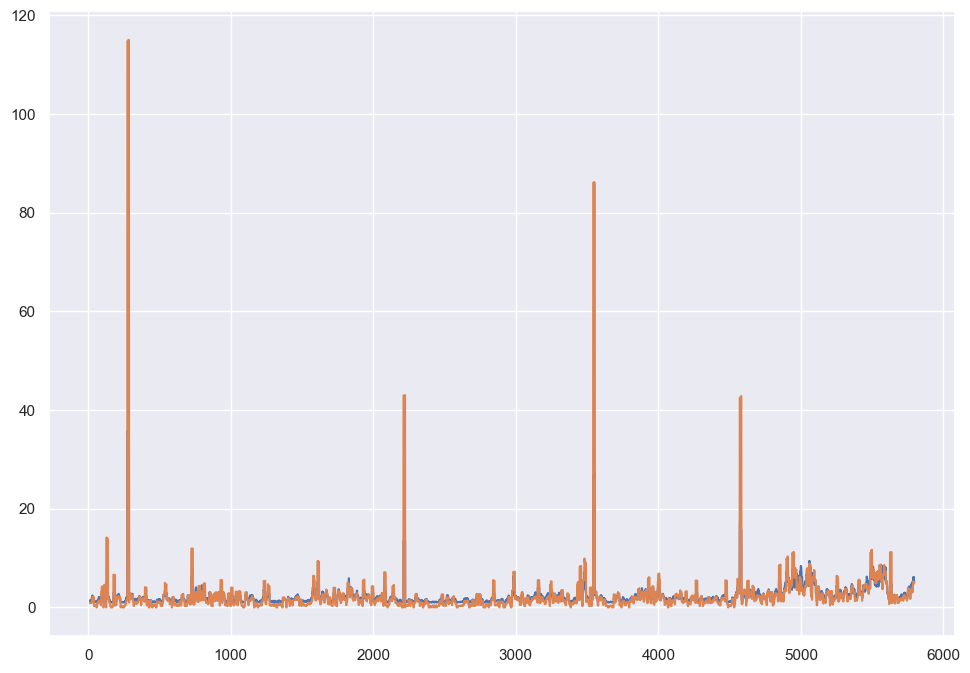

In [325]:
# Plot the rolling mean and rolling standard deviation of the 'Qty' column
df['Qty'].rolling(window=12).mean().plot()
df['Qty'].rolling(window=12).std().plot()
plt.show()


These plots have some variation, but overall seems to be stationary. The first plot is just the quanity of units sold over time. While the second visual shows the rolling mean and rolling standard deviation over time. Both have the occasional large orders, but on average they both end up coming back down and appearing stationary.
One final test would be the Adfuller test which is a statistacal test and will return a value for us to base our decision off of.

In [326]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#https://machinelearningmastery.com/time-series-data-stationary-python/

ADF Statistic: -73.642596
p-value: 0.000000


In [327]:
# An alternate test to help confirm the series is stationary when table is converted...
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

#https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide


A negative ADF statistic value, in this case -76, indicates that the time series is very likely to be stationary. This is because, in the ADF test, the null hypothesis is that there is a unit root (non-stationarity) in the time series, and a low p-value (typically less than 0.05) is used to reject the null hypothesis and conclude the time series is stationary. 

There is the occasional large that represents the single large orders, other than that the data looks sationary which is backed up by our two different AdFuller test and visuals.

##### P,D, Q
Another important aspect we will have to address soon is the parameter for the SARIMA time-series, which are denoted with 'P', 'D', and 'Q'. With the results of this ADFuller test we can assume our D paramter will be set to 0. The parameters are represented as follows:
-  p: is the order of the autoregressive term (AR), which is the number of lags used in the model. It describes the number of past values used to predict the next value.
-  d: is the order of the differencing term (I), which is used to make the time series stationary by removing trends or seasonality. It represents the number of times the data has been differenced.
-  q: is the order of the moving average term (MA), which is the error term that captures the short-term fluctuations in the data. It represents the number of past forecast errors used to predict the next value.
The 'S' in SARIMA represents the seasonality aspect of the model, usually the notation is 'SARIMA(p,d,q)(P,D,Q)m' with 'm' being a constant such as 12(months).
#https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

To find these values I will perform a GridSearch, but first a few last things with our dataframe. A key component of a time-series model is converting the table to 'DateTimeIndex' which makes the 'Date' column the index and lets us use the date's frequency information in our models. I will also create new dataframes for the grip kit colors.
***

In [328]:
# Data is stationary, changing to date time index.
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)


In [329]:
df.head()

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-26,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-27,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-05-14,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,34.95,34.95
2018-06-22,FireWrap Grip Kit - Light Blue,Invoice,4.0,26.00,104.00


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5740 entries, 2018-03-23 to 2022-12-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Transaction Type  5740 non-null   object 
 2   Qty               5740 non-null   float64
 3   Sales_Price       5740 non-null   float64
 4   Amount            5740 non-null   object 
dtypes: float64(2), object(3)
memory usage: 269.1+ KB



The index is now changed to 'Date' and it should also be noted that if we leave the frequency of the dates as inidividual days it can create a lot of noise in our models.  Therefore it should be beneficial to resample the dates to weeks or months to reduce the noise in the data and make it easier to identify patterns and trends. This will also make it easier to train the model as fewer data points will be used.
<br></br>
The dataset ranges 5 years, formatting it to months, would allow to better identify trends in sales over time. By formatting it to weeks, we can analyze the data by looking at the seasonality of the data. We can identify which months of the year the sales are highest and lowest, or identify any cyclical patterns that occur over time. This can be useful to understand patterns in the data and make predictions on future sales.

In [334]:
#df_weekly = df.resample('W-SAT')
#weekly_mean = df_weekly.mean()





,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-26,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-27,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-05-14,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,34.95,34.95
2018-06-22,FireWrap Grip Kit - Light Blue,Invoice,4.0,26.00,104.00
...,...,...,...,...,...
2022-11-28,FireWrap® Grip Kit Yellow,Invoice,7.0,21.75,152.25
2022-12-06,FireWrap® Grip Kit Yellow,Invoice,6.0,27.95,167.70
2022-12-12,FireWrap® Grip Kit Yellow,Invoice,5.0,21.75,108.75


### Final DataFrames:
As we are approaching the modeling phase there is one last bit of tidying up I would like to do. Seeing how the Black, Red and Blue grip kits account for over 60% of items sold, these will be the only three that the time series model will be ran on. I will rename them to simply their color.
I plan on running 3 different SARIMA models separately, so after I rename them I will create a new DataFrame for each color.

In [336]:
# Renaming Red Black and Blue
df.replace({'FireWrap® Grip Kit Black': 'Black','FireWrap® Grip Kit Red': 'Red','FireWrap® Grip Kit Blue': 'Blue'}, inplace=True)


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5740 entries, 2018-03-23 to 2022-12-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Transaction Type  5740 non-null   object 
 2   Qty               5740 non-null   float64
 3   Sales_Price       5740 non-null   float64
 4   Amount            5740 non-null   object 
dtypes: float64(2), object(3)
memory usage: 429.1+ KB


In [339]:
# Checking to make sure those 3 colors are changed..
df['Product_ID'].unique()

array(['FireWrap Grip Kit - Light Blue', 'FireWrap Grip Kit - Pink',
       'Black', 'Blue', 'FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Red', 'FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'FireWrap® Grip Kit White'],
      dtype=object)

In [341]:
#Creating DF for each color that will be used...
df_black = df[df['Product_ID'] == 'Black']
df_red = df[df['Product_ID'] == 'Red']
df_blue = df[df['Product_ID'] == 'Blue']

In [342]:
# Checking new DataFrames
print(df_black.head(4))
print(df_red.head(3))
print(df_blue.head(3))

           Product_ID Transaction Type  Qty  Sales_Price    Amount
Date                                                              
2018-03-23      Black    Sales Receipt  8.0        24.95  199.60  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
           Product_ID Transaction Type  Qty  Sales_Price   Amount
Date                                                             
2018-03-23        Red    Sales Receipt  1.0        24.95  24.95  
2018-03-24        Red    Sales Receipt  1.0        24.95  24.95  
2018-03-24        Red    Sales Receipt  2.0        24.95  49.90  
           Product_ID Transaction Type  Qty  Sales_Price   Amount
Date                                                             
2018-03-24       Blue    Sales Receipt  1.0        24.95  24.95  
2018-03-24       Blue    Sales Receipt  4.0        24.95  99.80  
2018

****
We now have 3 dataframes for the colors that we plan on running the model on. The next few cells will have some very important steps that are necessary for optimizing accuracy in our results. First for each of the three tables I will use the 'bfill' attribute which should fill missing values with the last valid observation and helps maintain integrity of the data when going through the model. We will also resample the tables so that they are formatted to weeks instead of months which I think is better for this sized dataset.

In [344]:
# The term bfill means that we use the value before filling in missing values
df_black = df_black.fillna(df_black.bfill())

df_black

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,Black,Sales Receipt,8.0,24.95,199.60
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-25,Black,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-27,Black,Invoice,4.0,21.75,87.00
2023-01-06,Black,Invoice,6.0,21.75,130.50
2023-01-06,Black,Invoice,10.0,21.75,217.50


In [348]:
# Resampling to the data into groups by weeks starting on Saturday...
df_black_weekly = df_black.resample('W-SAT')
weekly_black_mean = df_black_weekly.mean()


In [345]:
df_blue = df_blue.fillna(df_blue.bfill())

df_blue

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-24,Blue,Sales Receipt,1.0,24.95,24.95
2018-03-24,Blue,Sales Receipt,4.0,24.95,99.80
2018-03-30,Blue,Sales Receipt,1.0,24.95,24.95
2018-03-31,Blue,Sales Receipt,1.0,24.95,24.95
2018-04-01,Blue,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-06,Blue,Invoice,4.0,21.75,87.00
2022-12-06,Blue,Invoice,6.0,27.95,167.70
2022-12-12,Blue,Invoice,3.0,21.75,65.25


In [350]:
df_blue_weekly = df_blue.resample('W-SAT')
weekly_blue_mean = df_blue_weekly.mean()

weekly_blue_mean.head()

,Qty,Sales_Price
Date,,
2018-03-24,2.5,24.95
2018-03-31,1.0,24.95
2018-04-07,1.0,24.95
2018-04-14,1.0,24.95
2018-04-21,NaN,NaN


In [346]:
df_red = df_red.fillna(df_red.bfill())

df_red

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,Red,Sales Receipt,1.0,24.95,24.95
2018-03-24,Red,Sales Receipt,1.0,24.95,24.95
2018-03-24,Red,Sales Receipt,2.0,24.95,49.90
2018-03-25,Red,Sales Receipt,1.0,24.95,24.95
2018-03-26,Red,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-27,Red,Invoice,1.0,21.75,21.75
2022-12-27,Red,Invoice,2.0,21.75,43.50
2022-12-27,Red,Invoice,3.0,21.75,65.25


In [352]:
df_red_weekly = df_red.resample('W-SAT')
weekly_red_mean = df_red_weekly.mean()

weekly_red_mean

,Qty,Sales_Price
Date,,
2018-03-24,1.333333,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.666667,24.950000
2018-04-14,1.333333,24.950000
2018-04-21,1.000000,24.950000
...,...,...
2022-12-17,3.533333,26.563333
2022-12-24,1.200000,28.350000
2022-12-31,1.333333,26.630000


### Models:

We now have our data set up to where we can work with it, finally. This brings us to the meat and potatoes portion of the project, the modelling. To begin we need to identify our parameters which will be done via grid search, after that we will fit them to the model which will allow us to make predictions and evaluate. To give us a better idea of how the SARIMA model works, here is a brief summary:

SARIMA (Seasonal AutoRegressive Integrated Moving Average) models are a type of time series forecasting models that are used to model and predict future values based on past observations. They are an extension of the standard ARIMA (AutoRegressive Integrated Moving Average) models that include a seasonal component.

The basic structure of a SARIMA model is composed of three components:

-  AutoRegressive (AR) component: This component models the relationship between an observation and a number of lagged observations. It's represented by the parameter "p" in the SARIMA model.
 
-  Integrated (I) component: This component models the relationship between the observations and the differences between consecutive observations. It's represented by the parameter "d" in the SARIMA model.
 
-  Moving Average (MA) component: This component models the relationship between the observations and the error term (i.e. the difference between the actual observation and the prediction). It's represented by the parameter "q" in the SARIMA model.

-  Seasonal component: This component models the relationship between the observation and the lagged observations at the same time of the year. It's represented by the parameter "P", "D", and "Q" in the SARIMA model.
These parameters of the model we will try to find by performing a grid search over different combinations of parameters.

Once the parameters are chosen, the model is trained on a set of historical data, and used to make predictions about future values. The model takes into account both the trend and the seasonality of the data.
#https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide

##### Regularization Measure
The Bayesian Information Criterion (BIC) is a measure of the relative quality of statistical models. It is commonly used in the field of time series analysis to compare the quality of different models. BIC is a trade-off between the goodness of fit of the model and the complexity of the model. The lower the BIC score, the better the model fit is, and the simpler the model is.

In [353]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 52 in the 's' position as we have weekly data
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [362]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=500, freq=52):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(weekly_black_mean['Qty'],
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                )

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}52 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    

In [ ]:
sarimax_gridsearch(weekly_black_mean['Qty'], pdq, pdqs, freq=52)


SARIMAX (0, 0, 0) x (0, 0, 0, 52)52 : BIC Calculated =1475.7674121046146
SARIMAX (0, 0, 0) x (0, 0, 1, 52)52 : BIC Calculated =902.9776044645167
SARIMAX (0, 0, 0) x (0, 0, 2, 52)52 : BIC Calculated =712.4143710121357
SARIMAX (0, 0, 0) x (0, 1, 0, 52)52 : BIC Calculated =1208.572309035162
SARIMAX (0, 0, 0) x (0, 1, 1, 52)52 : BIC Calculated =5727.4266463119375
SARIMAX (0, 0, 0) x (0, 1, 2, 52)52 : BIC Calculated =476.5798049783701
SARIMAX (0, 0, 0) x (0, 2, 0, 52)52 : BIC Calculated =1087.548618890371
SARIMAX (0, 0, 0) x (0, 2, 1, 52)52 : BIC Calculated =561.2411372146348
SARIMAX (0, 0, 0) x (0, 2, 2, 52)52 : BIC Calculated =244.60127241970196
SARIMAX (0, 0, 0) x (1, 0, 0, 52)52 : BIC Calculated =940.7361031833159
SARIMAX (0, 0, 0) x (1, 0, 1, 52)52 : BIC Calculated =908.1437623871003
SARIMAX (0, 0, 0) x (1, 0, 2, 52)52 : BIC Calculated =717.4044937771263
SARIMAX (0, 0, 0) x (1, 1, 0, 52)52 : BIC Calculated =710.8648195084845
SARIMAX (0, 0, 0) x (1, 1, 1, 52)52 : BIC Calculated =4243.06

In [ ]:
train = df_black['Qty'].loc[df.index < '01-01-2022']
test = df_black['Qty'].loc[df.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Finally running our auxillary stationarity function on the test and train data to make sure it is still stationary.

In [ ]:
check_stationarity(train)

In [ ]:
check_stationarity(test)

In [ ]:
# Taking a look at a random week
df['Qty'].loc[(df['Qty'].index > '01-01-2019') & (df.index < '01-08-2019')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
# Taking a look at a month
df.loc[(df.index > '02-01-2020') & (df.index < '03-01-2020')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

AIC and BIC are two commonly used model selection criteria in time series analysis. AIC (Akaike Information Criterion) is a measure of the relative quality of a statistical model, that balances the fit of the model to the data with the complexity of the model. AIC is defined as 2K - 2ln(L), where K is the number of parameters in the model and L is the likelihood of the data given the model. The lower the AIC value, the better the model.

BIC (Bayesian Information Criterion) is similar to AIC, but it penalizes the model more heavily for having a large number of parameters. BIC is defined as K*ln(n) - 2ln(L), where n is the number of observations and K, L are the same as in AIC. The lower the BIC value, the better the model.

In [ ]:

# Plot the time series
#monthly_mean.plot(figsize=(15, 6))
#plt.show()
#print(monthly_mean.head())

### Recommendations



However, it's important to keep in mind that forecasting is not always accurate and unexpected events can happen, so it's important to have a buffer inventory to handle unexpected demand or supply chain disruptions. Additionally, other factors such as pricing, marketing, and competition can affect the demand for the product, so it's important to consider these factors in your inventory management strategy.

In [ ]:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value